# YOLOv8 Model_02

In [ ]:
# Import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# HOME = os.path.join(os.getcwd(),'/drive/MyDrive/GA_Capstone')
# print(HOME)

HOME = '/content/drive/MyDrive/GA_Capstone'

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

# !pip install ultralytics==8.0.20
!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## **Importing Data**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

mkdir: cannot create directory ‘/content/drive/MyDrive/GA_Capstone/datasets’: File exists
/content/drive/MyDrive/GA_Capstone/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.2 MB/s eta 0:00:00


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

"""
Initializes the Roboflow client, specifies the project and workspace to work with,
and downloads the dataset in YOLOv8 format.

"""

from roboflow import Roboflow
rf = Roboflow(api_key="sChcgSlVT8i3MuiPPAj8")
project = rf.workspace("ga-capstone-3f9vu").project("crowd_count_v2")
dataset = project.version(2).download("yolov8")

mkdir: cannot create directory ‘/content/drive/MyDrive/GA_Capstone/datasets’: File exists
/content/drive/MyDrive/GA_Capstone/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Crowd_Count_v2-2 in yolov8:: 100%|██████████| 8334/8334 [42:48<00:00,  3.24it/s]


In [ ]:
# !mkdir {HOME}/datasets
# %cd {HOME}/datasets

# !pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# dataset = project.version(1).download("yolov8")

## Modeling

Training with 100 epoch & batch size of 8.

In [ ]:
HOME

'/content/drive/MyDrive/GA_Capstone'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/data.yaml epochs=200 batch=8 imgsz=640 plots=True

/content/drive/MyDrive/GA_Capstone
New https://pypi.org/project/ultralytics/8.0.143 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/data.yaml, epochs=200, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid

In [ ]:
%cd {HOME}

!yolo task=detect mode=train resume model=/content/drive/MyDrive/GA_Capstone/runs/detect/train13/weights/last.pt data=/content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/data.yaml epochs=200 batch=8 imgsz=640 plots=True

/content/drive/MyDrive/GA_Capstone
New https://pypi.org/project/ultralytics/8.0.143 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/GA_Capstone/runs/detect/train13/weights/last.pt, data=/content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/data.yaml, epochs=200, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=F

In [ ]:
!ls {HOME}/runs/detect/train13/

args.yaml					     train_batch0.jpg
confusion_matrix_normalized.png			     train_batch1.jpg
confusion_matrix.png				     train_batch2.jpg
events.out.tfevents.1690455312.a34e3a7357e0.11134.0  train_batch69160.jpg
events.out.tfevents.1690472695.75d2a50639c0.8410.0   train_batch69161.jpg
F1_curve.png					     train_batch69162.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights


/content/drive/MyDrive/GA_Capstone


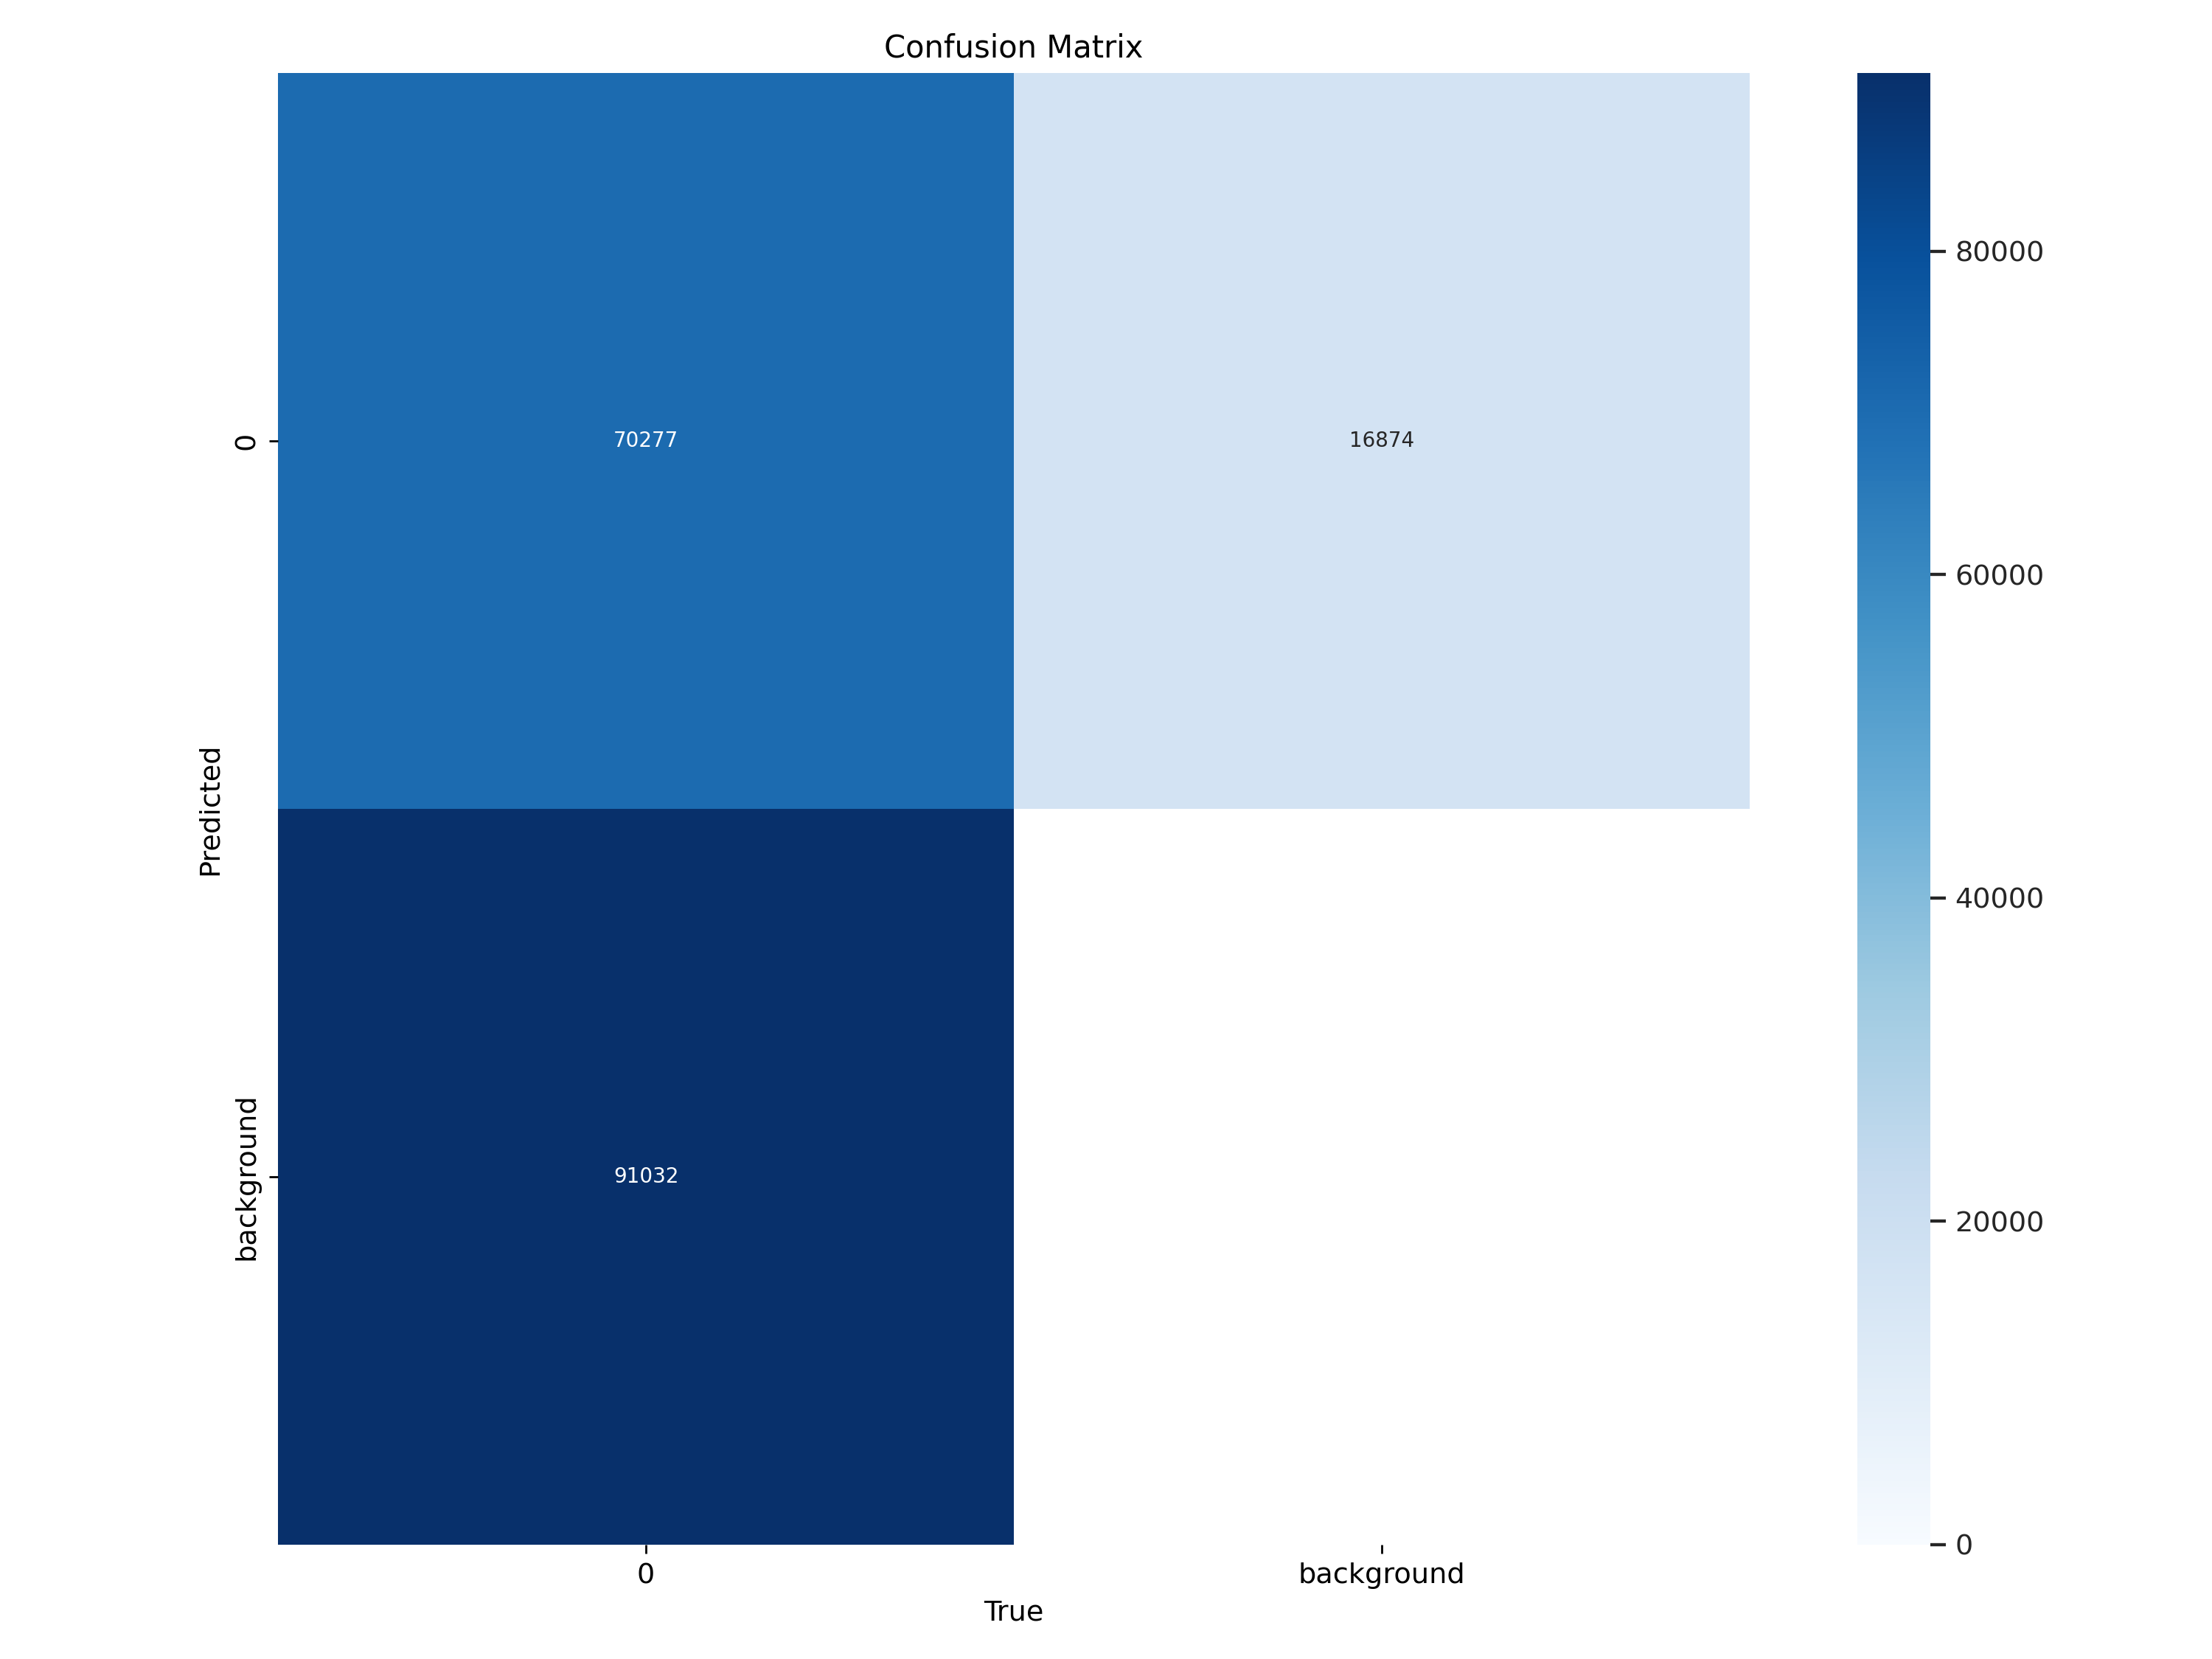

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train13/confusion_matrix.png', width=600)

/content/drive/MyDrive/GA_Capstone


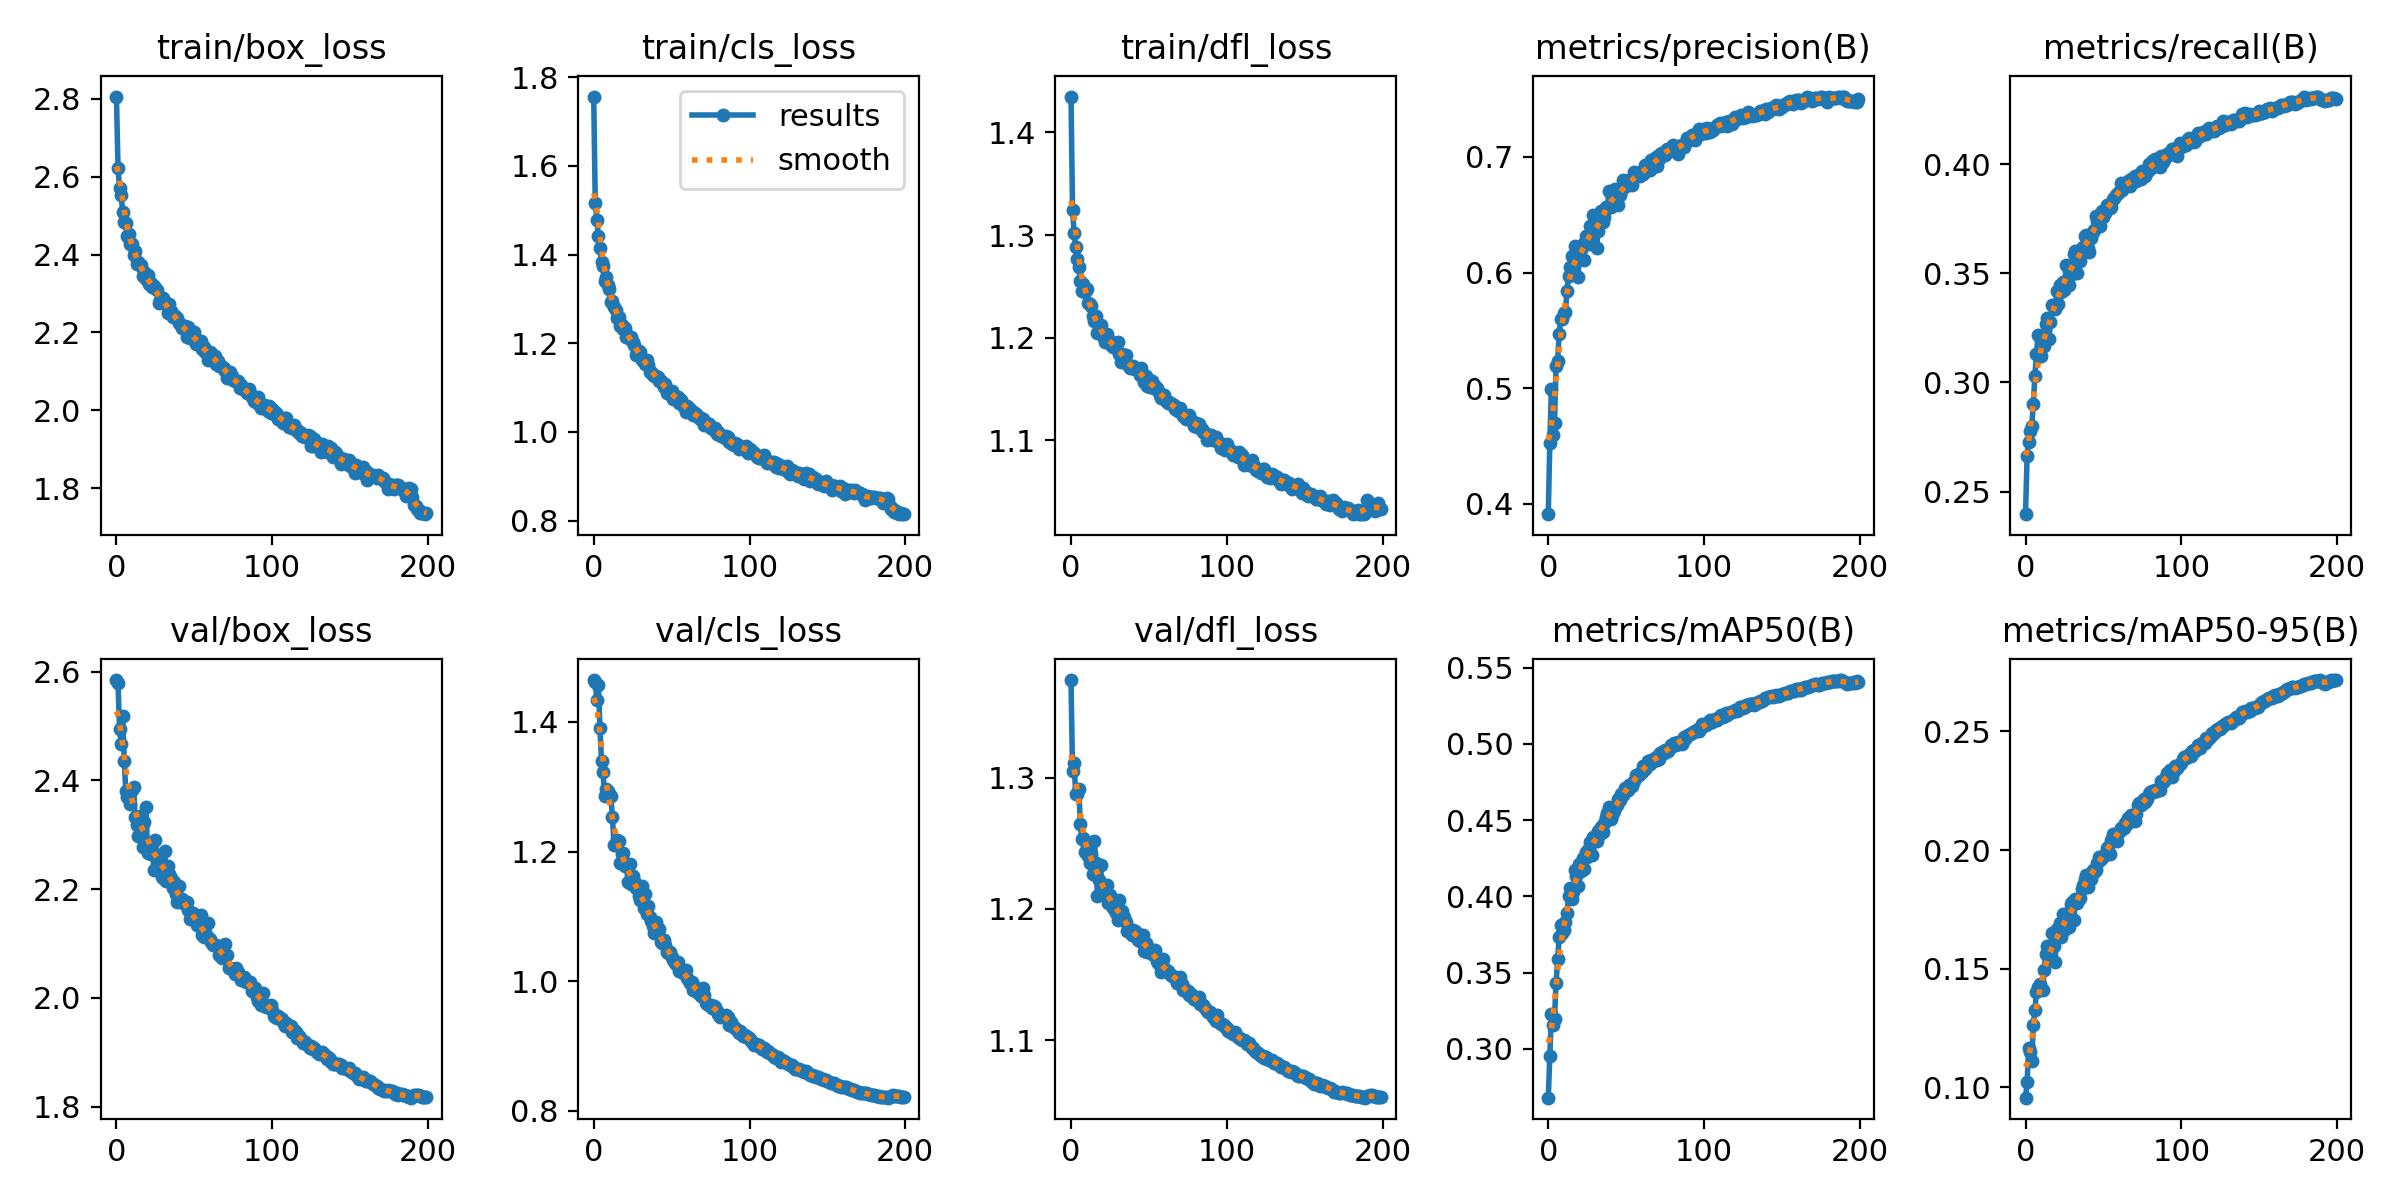

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train13/results.png', width=600)

/content/drive/MyDrive/GA_Capstone


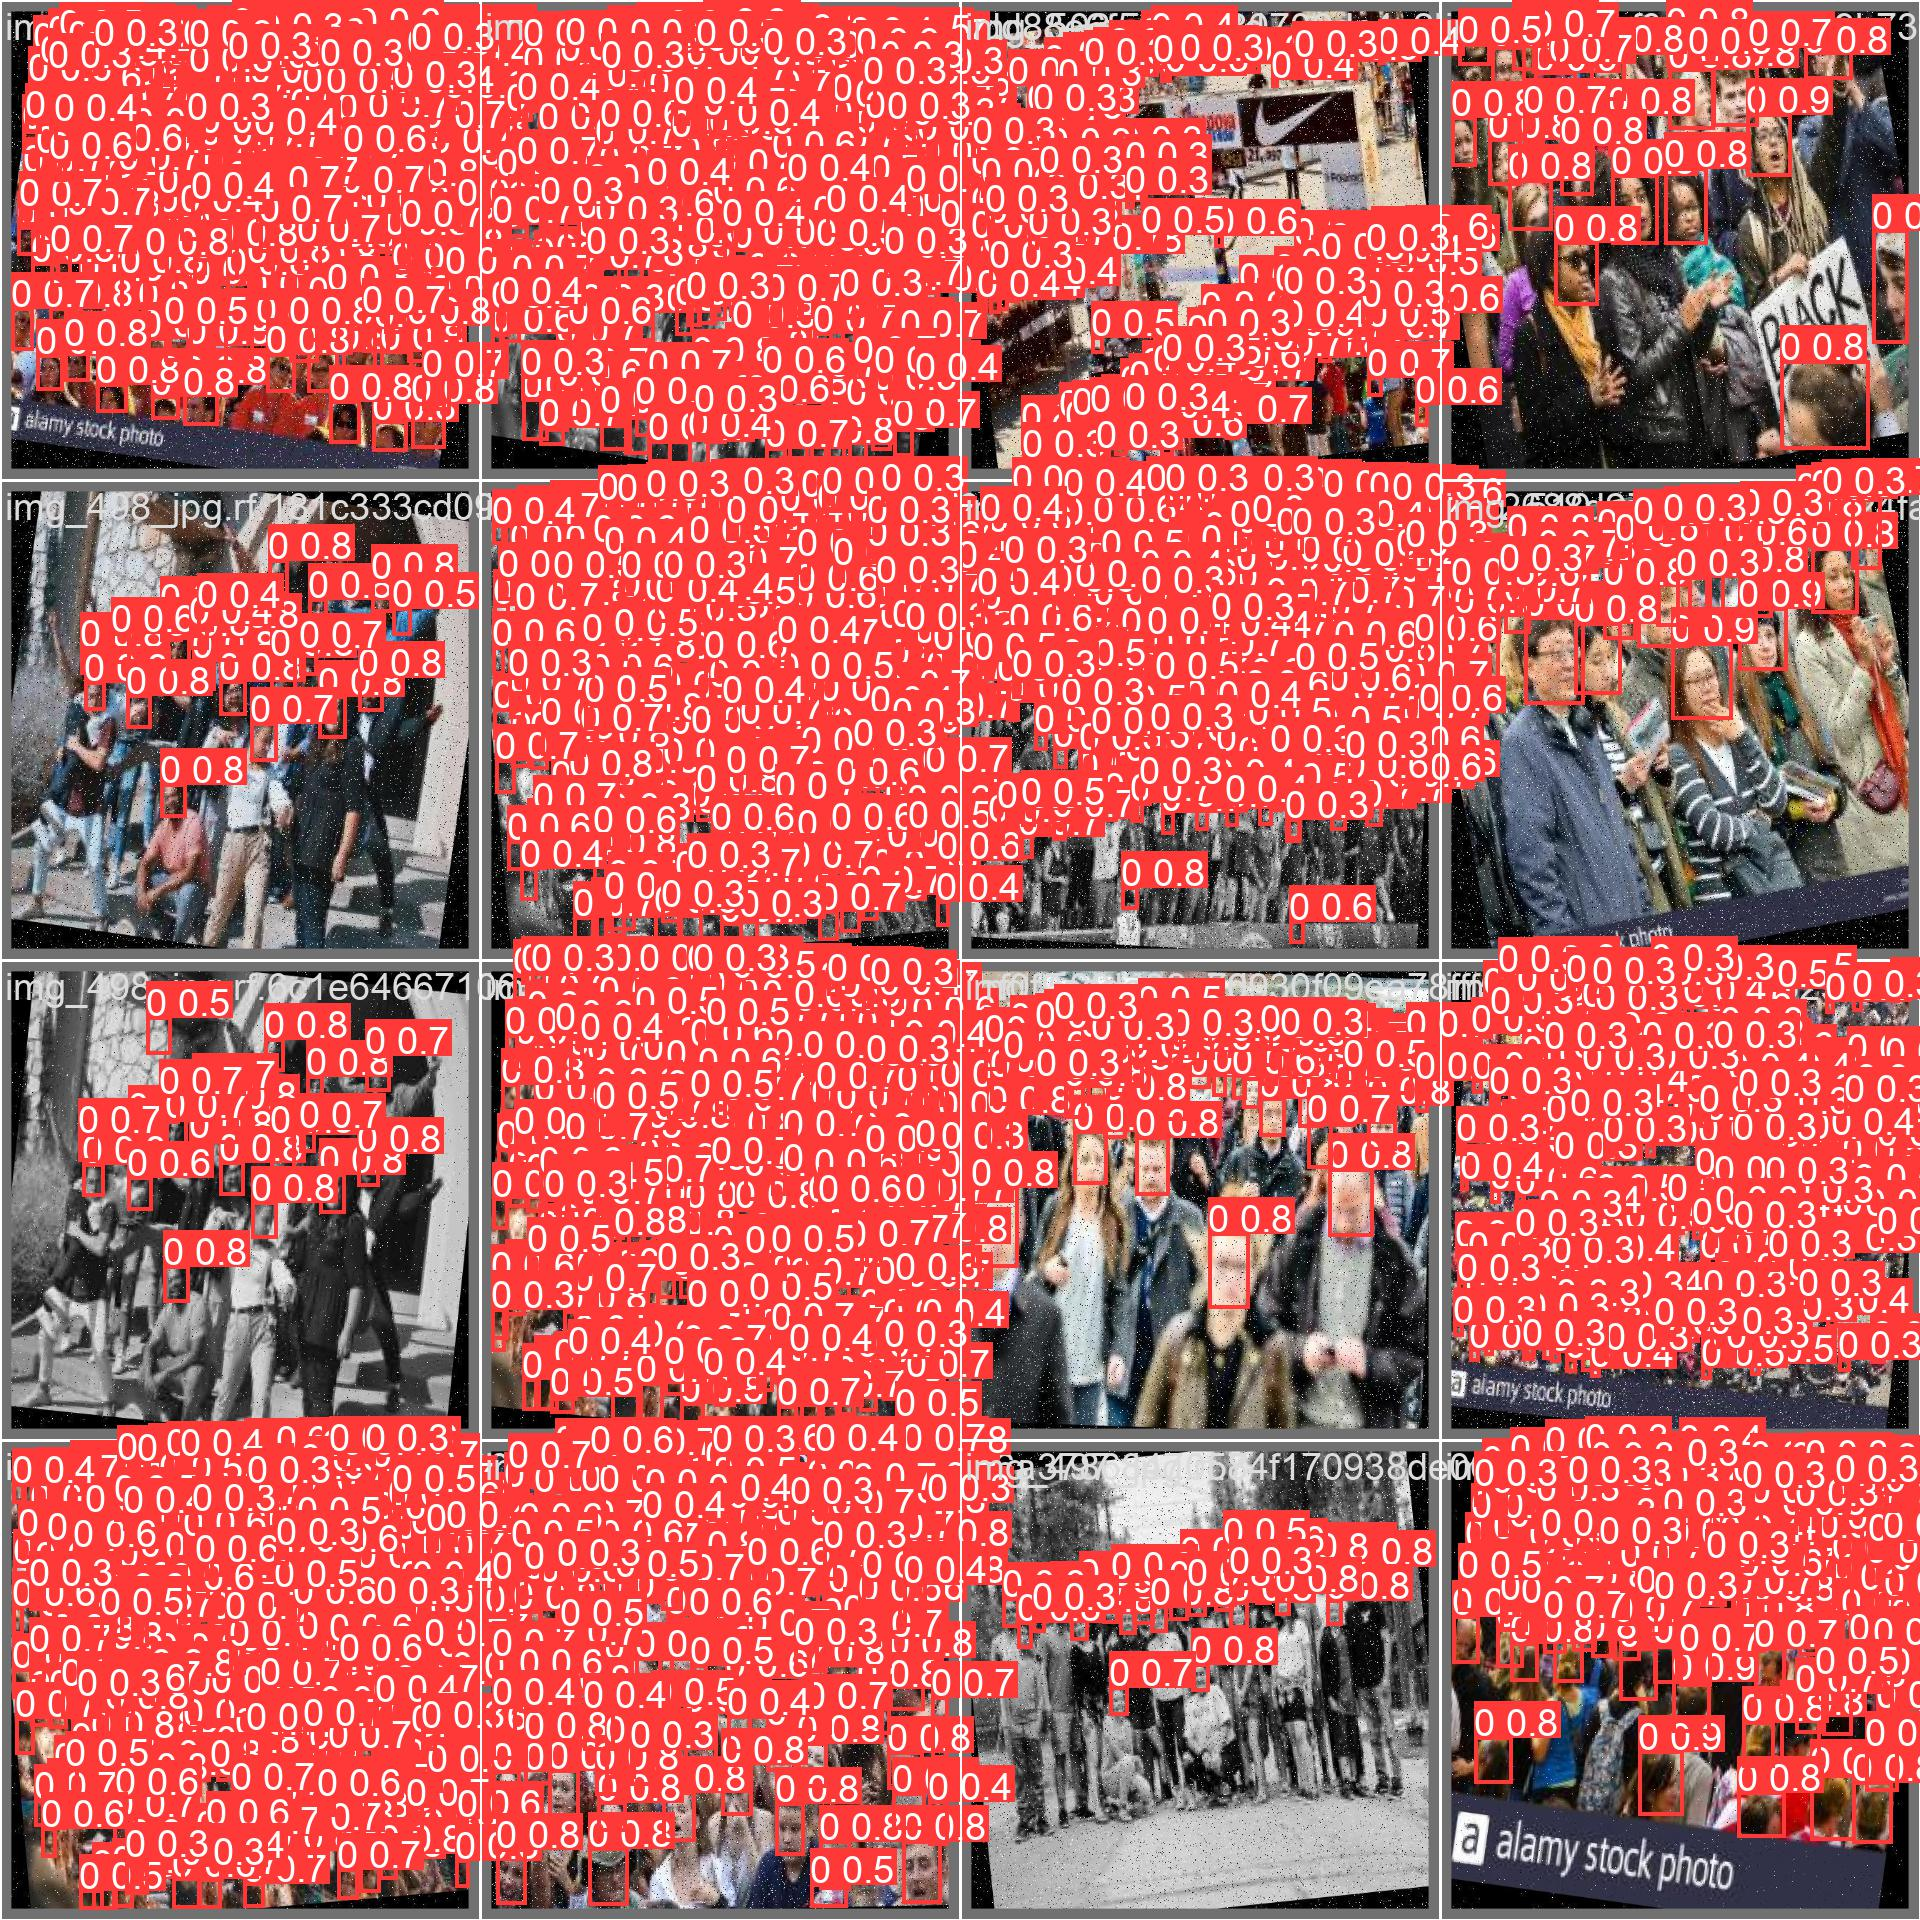

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train13/val_batch0_pred.jpg', width=600)

## Validate Model

In [ ]:
{dataset.location}

NameError: ignored

In [ ]:
# Validation on train set
!yolo task=detect mode=val model=/content/drive/MyDrive/GA_Capstone/runs/detect/train13/weights/best.pt data=/content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/data.yaml plots=True save_json=True split=train

Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/train/labels.cache... 2909 images, 0 backgrounds, 1 corrupt: 100% 2910/2910 [00:00<?, ?it/s]
train: WARNING ⚠️ /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/train/images/img_1248_jpg.rf.f612c06e499635dc1a57f6a1a2c31175.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/train/images/img_161_jpg.rf.2c52b6089b76385ae4c1414932372db4.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/train/images/img_161_jpg.rf.2c52b6089b76385ae4c1414932372db4.jpg'
train: WARNING ⚠️ /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/train/images/img_407_jpg.rf.0091f81400c8238b5aa4b82cb898aeb4.jpg: 1 duplicate labels removed
tr

In [ ]:
# Validation on Validation set
!yolo task=detect mode=val model=/content/drive/MyDrive/GA_Capstone/runs/detect/train13/weights/best.pt data=/content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/data.yaml plots=True save_json=True

Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/valid/labels.cache... 836 images, 0 backgrounds, 0 corrupt: 100% 836/836 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/valid/images/img_1248_jpg.rf.f5071a1c20118ca17541998c4e8ffc2f.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/valid/images/img_434_jpg.rf.5a4ae5c185c88c91f91dee12ed942a4f.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/valid/images/img_436_jpg.rf.47ec601eb5a775e399d300e2eacfb63d.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/valid/images/img_469_jpg.rf.70de792333442982760711f27570411c.jpg: 1 duplicate labels removed

In [ ]:
# Validation on test set
!yolo task=detect mode=val model=/content/drive/MyDrive/GA_Capstone/runs/detect/train13/weights/best.pt data=/content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/data.yaml plots=True save_json=True split=test

Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/labels.cache... 415 images, 0 backgrounds, 0 corrupt: 100% 415/415 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1248_jpg.rf.677fef2882f44d48c56a07162cb85175.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_529_jpg.rf.8622c1a359153857b6936bd8dafe5bac.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [01:49<00:00,  4.21s/it]
                   all        415      73821      0.749      0.453      0.557       0.28
Speed: 1.5ms preprocess, 10.3ms inference, 0.0ms loss, 5.8ms postprocess per image
Saving runs/detect/val11/predictions.json...

## Inference with Model

In [ ]:
{HOME}

{'/content/drive/MyDrive/GA_Capstone'}

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/drive/MyDrive/GA_Capstone/runs/detect/train13/weights/best.pt conf=0.25 source=/content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images save=True save_txt=True

/content/drive/MyDrive/GA_Capstone
Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1003_jpg.rf.c64592f26261c2e2b06016616747b666.jpg: 640x640 60 0s, 16.3ms
image 2/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1005_jpg.rf.000fa6ad1952476049e2cd412c818584.jpg: 640x640 42 0s, 16.3ms
image 3/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1008_jpg.rf.09e915f3ffba80ab2491dfbc4df9592c.jpg: 640x640 31 0s, 16.3ms
image 4/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1008_jpg.rf.722508797a8901a59d9015673973dcff.jpg: 640x640 37 0s, 16.2ms
image 5/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1011_jpg.rf.47d19a3aaec3730637c54661fc086596.jpg: 640x640 260 0s, 18.0ms
ima

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train13/weights/best.pt conf=0.25 source={HOME}/datasets/Crowd_Count_v2-1/test/images save=True save_txt=True

/content/drive/MyDrive/GA_Capstone
Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1003_jpg.rf.c64592f26261c2e2b06016616747b666.jpg: 640x640 58 0s, 16.3ms
image 2/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1005_jpg.rf.000fa6ad1952476049e2cd412c818584.jpg: 640x640 42 0s, 16.3ms
image 3/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1008_jpg.rf.09e915f3ffba80ab2491dfbc4df9592c.jpg: 640x640 27 0s, 16.2ms
image 4/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1008_jpg.rf.722508797a8901a59d9015673973dcff.jpg: 640x640 33 0s, 16.2ms
image 5/415 /content/drive/MyDrive/GA_Capstone/datasets/Crowd_Count_v2-1/test/images/img_1011_jpg.rf.47d19a3aaec3730637c54661fc086596.jpg: 640x640 285 0s, 32.3ms
ima

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
# !pip install ultralytics==8.0.134

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.2/78.2 GB disk)


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train13")

View the status of your deployment at: https://app.roboflow.com/ga-capstone-3f9vu/crowd_count_v2/2
Share your model with the world at: https://universe.roboflow.com/ga-capstone-3f9vu/crowd_count_v2/model/2
